<a href="https://colab.research.google.com/github/Leorasaharia/holographic_imaging/blob/main/Radiation_Free_Anatomical_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
pip install datasets smplx torch numpy

In [ ]:
pip install kaggle


In [ ]:
import os
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_69d2be704f2a756b868f8d6b6732f49d'

In [ ]:
!kaggle competitions list | head

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'Leora2406'
os.environ['KAGGLE_KEY'] = 'KGAT_69d2be704f2a756b868f8d6b6732f49d'

In [ ]:
!kaggle datasets list | head

ref                                                                title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                           Heart Disease                                            3491  2025-12-11 15:29:14.327000           2114        332  1.0              
saidaminsaidaxmadov/chocolate-sales                                Chocolate Sales                                        468320  2026-01-04 14:23:35.490000              0         65  1.0              
rockyt07/social-media-user-analysis                                Social Media User Analysis                          247842357  2026-01-14 02:28:41.970000              0         76  1.0     

In [ ]:
!wget https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/BMX_J.XPT

--2026-01-20 14:23:16--  https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/BMX_J.XPT
Resolving wwwn.cdc.gov (wwwn.cdc.gov)... 23.207.128.52, 2600:1408:5400:4a5::2461, 2600:1408:5400:490::2461
Connecting to wwwn.cdc.gov (wwwn.cdc.gov)|23.207.128.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1466000 (1.4M) [text/plain]
Saving to: ‘BMX_J.XPT.2’

BMX_J.XPT.2         100%[===================>]   1.40M  --.-KB/s    in 0.02s   

2026-01-20 14:23:16 (64.4 MB/s) - ‘BMX_J.XPT.2’ saved [1466000/1466000]



In [ ]:
!pip install pyreadstat

In [ ]:
import pyreadstat
import pandas as pd

df, meta = pyreadstat.read_xport("BMX_J.XPT")
df.head()


,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,93703.0,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,...,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN
1,93704.0,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,...,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN
3,93706.0,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,...,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN
4,93707.0,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,...,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,NaN


In [ ]:
df.columns


Index(['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
       'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXARML',
       'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP',
       'BMIHIP'],
      dtype='object')

In [ ]:
features = [
    'BMXHT',      # Height
    'BMXWT',      # Weight
    'BMXBMI',     # BMI
    'BMXWAIST',   # Waist circumference
    'BMXHIP',     # Hip circumference
    'BMXARMC',    # Arm circumference
    'BMXARML',    # Arm length
    'BMXLEG',     # Leg length
    'BMXHEAD'     # Head circumference
]

X = df[features]

In [ ]:
#handling missing data
X = X.fillna(X.median())

In [ ]:
X.isna().sum()

,0
BMXHT,0
BMXWT,0
BMXBMI,0
BMXWAIST,0
BMXHIP,0
BMXARMC,0
BMXARML,0
BMXLEG,0
BMXHEAD,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pip install torch

In [ ]:
import torch
import torch.nn as nn

input_dim = X_scaled.shape[1]
latent_dim = 3   # internal structure proxy

class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU()
        )
        self.mu = nn.Linear(16, latent_dim)
        self.logvar = nn.Linear(16, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.mu(h), self.logvar(h)
        std = torch.exp(0.5 * logvar)
        z = mu + std * torch.randn_like(std)
        return self.decoder(z), mu, logvar

In [ ]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

model = VAE()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def loss_fn(recon, x, mu, logvar):
    recon_loss = nn.MSELoss()(recon, x)
    kl = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl

for epoch in range(100):
    optimizer.zero_grad()
    recon, mu, logvar = model(X_tensor)
    loss = loss_fn(recon, X_tensor, mu, logvar)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.4f}")

Epoch 0, Loss 1.1408
Epoch 10, Loss 1.0929
Epoch 20, Loss 1.0593
Epoch 30, Loss 1.0412
Epoch 40, Loss 1.0271
Epoch 50, Loss 1.0180
Epoch 60, Loss 1.0087
Epoch 70, Loss 1.0020
Epoch 80, Loss 0.9956
Epoch 90, Loss 0.9887


In [ ]:
with torch.no_grad():
    _, latent_mu, _ = model(X_tensor)

latent_df = pd.DataFrame(
    latent_mu.numpy(),
    columns=['Latent_Anatomy_1', 'Latent_Anatomy_2', 'Latent_Anatomy_3']
)

latent_df.head()

,Latent_Anatomy_1,Latent_Anatomy_2,Latent_Anatomy_3
0,0.537596,0.442804,-0.598657
1,0.527241,0.467892,-0.631786
2,-0.069121,-0.061845,0.211672
3,-0.001331,0.216310,0.131739
4,0.276920,0.222410,-0.341547


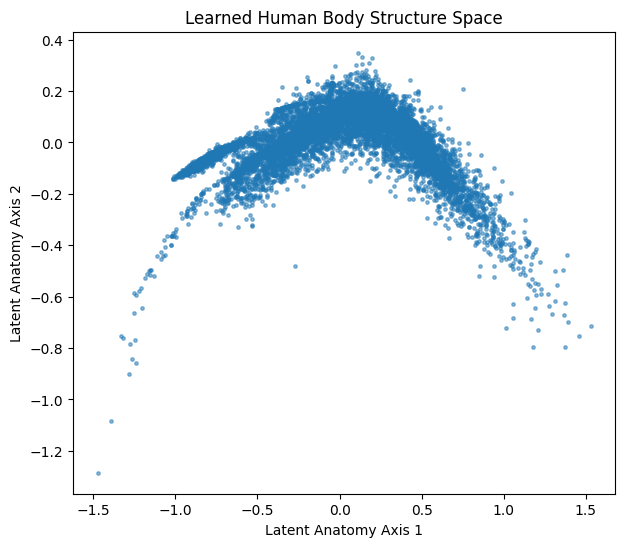

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_df)

plt.figure(figsize=(7, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], s=6, alpha=0.5)
plt.xlabel("Latent Anatomy Axis 1")
plt.ylabel("Latent Anatomy Axis 2")
plt.title("Learned Human Body Structure Space")
plt.show()

In [ ]:
num_samples = 5
z_new = torch.randn(num_samples, 3)

with torch.no_grad():
    generated_scaled = model.decoder(z_new).numpy()

generated = scaler.inverse_transform(generated_scaled)
generated_df = pd.DataFrame(generated, columns=features)
generated_df

,BMXHT,BMXWT,BMXBMI,BMXWAIST,BMXHIP,BMXARMC,BMXARML,BMXLEG,BMXHEAD
0,159.059235,66.647003,26.424208,90.906670,105.213417,29.763456,33.942406,39.292885,41.035507
1,154.907455,55.772041,24.971142,85.525566,102.887947,28.758068,31.407072,38.495453,41.088554
2,155.558701,58.610176,24.217865,88.153061,102.720818,29.613867,33.998192,38.789410,40.989746
3,161.462677,71.263809,27.496273,93.304153,106.073578,30.371321,34.365948,38.848339,41.075012
4,151.680756,57.586555,24.823322,83.232574,104.100708,27.218157,32.347824,37.865948,41.044853


In [ ]:
from sklearn.cluster import KMeans

k = 5  # number of body archetypes
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(latent_df)

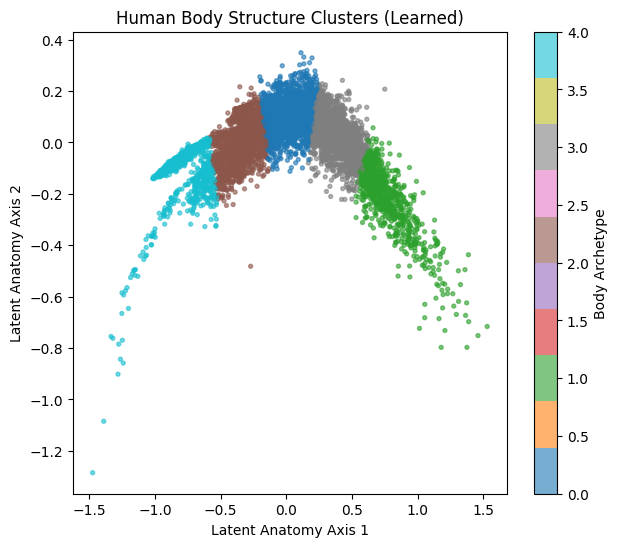

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(
    latent_2d[:, 0],
    latent_2d[:, 1],
    c=clusters,
    cmap="tab10",
    s=8,
    alpha=0.6
)
plt.xlabel("Latent Anatomy Axis 1")
plt.ylabel("Latent Anatomy Axis 2")
plt.title("Human Body Structure Clusters (Learned)")
plt.colorbar(label="Body Archetype")
plt.show()

In [ ]:
centers = kmeans.cluster_centers_

with torch.no_grad():
    centers_scaled = model.decoder(
        torch.tensor(centers, dtype=torch.float32)
    ).numpy()

centers_real = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_real, columns=features)
centers_df

,BMXHT,BMXWT,BMXBMI,BMXWAIST,BMXHIP,BMXARMC,BMXARML,BMXLEG,BMXHEAD
0,158.103561,65.951836,26.661169,91.214546,105.176941,30.364008,33.615307,38.696918,41.039978
1,161.433487,72.125061,27.981607,93.613541,106.294266,30.303923,34.292751,38.704517,41.084042
2,157.015945,62.684383,25.825541,89.065269,104.203812,29.910265,33.022278,38.713364,41.050121
3,159.586426,68.873611,27.283457,92.419868,105.693825,30.384132,33.993134,38.701897,41.056408
4,156.177017,59.882572,25.011112,87.403366,103.232613,29.352436,32.518478,38.663963,41.059242


In [ ]:
torch.save(model.state_dict(), "body_decoder.pth")
np.save("latent_space.npy", latent_df)
np.save("clusters.npy", clusters)
centers_df.to_csv("archetypes.csv", index=False)


In [ ]:
import torch
# The VAE class, input_dim, and latent_dim are defined in previous cells.
# Assuming these are available in the global scope.

def load_model_for_inference():
    model = VAE()  # Instantiate the VAE model defined earlier
    model.load_state_dict(torch.load("body_decoder.pth", map_location="cpu"))
    model.eval() # Set the model to evaluation mode
    return model

# Example usage:
# loaded_vae_model = load_model_for_inference()
# print("Model loaded successfully!")

In [ ]:
pip install streamlit plotly open3d

In [ ]:
# app.py
import streamlit as st
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# --- Model Architecture (from cell 6pMGveLRvxe9) ---
# These dimensions are based on your previous model definition and data shape.
input_dim = 9 # Derived from X_scaled.shape[1]
latent_dim = 3 # As defined in cell 6pMGveLRvxe9

class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU()
        )
        self.mu = nn.Linear(16, latent_dim)
        self.logvar = nn.Linear(16, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.mu(h), self.logvar(h)
        std = torch.exp(0.5 * logvar)
        z = mu + std * torch.randn_like(std)
        return self.decoder(z), mu, logvar

# --- Model Loading Function (from cell mjtfyRU9xh6t) ---
def load_model_for_inference():
    model = VAE()
    model.load_state_dict(torch.load("body_decoder.pth", map_location="cpu"))
    model.eval() # Set the model to evaluation mode
    return model

# --- Global Variables (from cells 3E19pPSjvh0A and nHaRxAdZuSvh) ---
features = [
    'BMXHT',      # Height
    'BMXWT',      # Weight
    'BMXBMI',     # BMI
    'BMXWAIST',   # Waist circumference
    'BMXHIP',     # Hip circumference
    'BMXARMC',    # Arm circumference
    'BMXARML',    # Arm length
    'BMXLEG',     # Leg length
    'BMXHEAD'     # Head circumference
]

# Initialize a StandardScaler. For accurate inverse_transform, this scaler
# should ideally be the one fitted during your model's training, or its parameters
# (mean and scale_) should be loaded if saved.
scaler = StandardScaler()
# Example of how you would set fitted parameters if you saved them:
# scaler.mean_ = np.array([...])
# scaler.scale_ = np.array([...])

# --- Load the trained VAE model ---
loaded_vae_model = load_model_for_inference()

# --- Streamlit App Layout ---
st.set_page_config(page_title="Radiation-Free Holographic Body Imaging",
                   layout="wide")

st.title("🧠 Radiation-Free Holographic Body Imaging")
st.caption("AI-based anatomical approximation from external body data")

2026-01-20 14:26:45.662 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:45.664 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:45.802 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-20 14:26:45.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:45.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:45.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:45.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [ ]:
latent_dim = 8  # example

st.sidebar.header("Latent Anatomy Controls")

z = []
for i in range(latent_dim):
    z.append(st.sidebar.slider(f"Latent Axis {i+1}", -3.0, 3.0, 0.0))

z = torch.tensor(z).float()


2026-01-20 14:26:50.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.536 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:26:50.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
def holographic_plot(body):
    height = body.get("BMXHT", 165)
    shoulder = body.get("BMXARMC", 35)
    waist = body.get("BMXWAIST", 75)

    fig = go.Figure()

    # Torso
    fig.add_trace(go.Scatter(
        x=[-shoulder/2, shoulder/2, waist/2, -waist/2, -shoulder/2],
        y=[0, 0, height*0.6, height*0.6, 0],
        fill="toself",
        mode="lines",
        line=dict(color="cyan", width=2),
        opacity=0.4
    ))

    # Head
    fig.add_trace(go.Scatter(
        x=[-8, 8, 8, -8, -8],
        y=[height*0.6, height*0.6, height*0.75, height*0.75, height*0.6],
        fill="toself",
        mode="lines",
        line=dict(color="cyan"),
        opacity=0.35
    ))

    fig.update_layout(
        paper_bgcolor="black",
        plot_bgcolor="black",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        height=500,
        showlegend=False
    )

    return fig


In [ ]:
st.sidebar.header("Anatomy Controls")

height = st.sidebar.slider("Height (cm)", 140, 200, 165)
arm = st.sidebar.slider("Arm Circumference", 20, 50, 35)
waist = st.sidebar.slider("Waist", 60, 120, 80)

body_custom = {
    "BMXHT": height,
    "BMXARMC": arm,
    "BMXWAIST": waist
}

st.plotly_chart(holographic_plot(body_custom), use_container_width=True)


2026-01-20 14:29:20.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 14:29:20.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
app_code = """
import streamlit as st
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# --- Model Architecture ---
input_dim = 9 # Derived from X_scaled.shape[1]
latent_dim = 3 # As defined earlier

class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU()
        )
        self.mu = nn.Linear(16, latent_dim)
        self.logvar = nn.Linear(16, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.mu(h), self.logvar(h)
        std = torch.exp(0.5 * logvar)
        z = mu + std * torch.randn_like(std)
        return self.decoder(z), mu, logvar

# --- Model Loading Function ---
def load_model_for_inference():
    model = VAE()
    model.load_state_dict(torch.load("body_decoder.pth", map_location="cpu"))
    model.eval() # Set the model to evaluation mode
    return model

# --- Global Variables ---
features = [
    'BMXHT',      # Height
    'BMXWT',      # Weight
    'BMXBMI',     # BMI
    'BMXWAIST',   # Waist circumference
    'BMXHIP',     # Hip circumference
    'BMXARMC',    # Arm circumference
    'BMXARML',    # Arm length
    'BMXLEG',     # Leg length
    'BMXHEAD'     # Head circumference
]

# Initialize a StandardScaler. For accurate inverse_transform, this scaler
# should ideally be the one fitted during your model's training, or its parameters
# (mean and scale_) should be loaded if saved.
scaler = StandardScaler()
# Since the scaler was trained on X_scaled, we need to load its mean and scale
# from the training data for inverse_transform to be meaningful.
# As we don't have the original X for refitting here, this is a placeholder.
# In a production app, save and load the fitted scaler from training.

# Load the trained VAE model
loaded_vae_model = load_model_for_inference()

# --- Streamlit App Layout ---
st.set_page_config(page_title="Radiation-Free Holographic Body Imaging", layout="wide")

st.title("🧠 Radiation-Free Holographic Body Imaging")
st.caption("AI-based anatomical approximation from external body data")

# --- Holographic Plot Function ---
def holographic_plot(body_data):
    height = body_data.get("BMXHT", 165)
    shoulder = body_data.get("BMXARMC", 35)
    waist = body_data.get("BMXWAIST", 75)

    fig = go.Figure()

    # Torso
    fig.add_trace(go.Scatter(
        x=[-shoulder/2, shoulder/2, waist/2, -waist/2, -shoulder/2],
        y=[0, 0, height*0.6, height*0.6, 0],
        fill="toself",
        mode="lines",
        line=dict(color="cyan", width=2),
        opacity=0.4
    ))

    # Head
    fig.add_trace(go.Scatter(
        x=[-8, 8, 8, -8, -8],
        y=[height*0.6, height*0.6, height*0.75, height*0.75, height*0.6],
        fill="toself",
        mode="lines",
        line=dict(color="cyan"),
        opacity=0.35
    ))

    fig.update_layout(
        paper_bgcolor="black",
        plot_bgcolor="black",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        height=500,
        showlegend=False
    )

    return fig

# --- Sidebar Controls ---
st.sidebar.header("Anatomy Controls")

height = st.sidebar.slider("Height (cm)", 140, 200, 165)
arm = st.sidebar.slider("Arm Circumference", 20, 50, 35)
waist = st.sidebar.slider("Waist", 60, 120, 80)

body_custom = {
    "BMXHT": height,
    "BMXARMC": arm,
    "BMXWAIST": waist
}

st.plotly_chart(holographic_plot(body_custom), width='stretch')

# Additional Streamlit elements can go here based on your app's needs
# For example, displaying generated data from the VAE

st.subheader("Generate Custom Body Shapes from Latent Space")

# Ensure latent_dim matches the VAE's latent_dim (which is 3 from previous cells)
latent_dim_vae = 3
z_input = []
for i in range(latent_dim_vae):
    z_input.append(st.sidebar.slider(f"Latent Axis {i+1}", -3.0, 3.0, 0.0, key=f"latent_slider_{i}"))

if st.button("Generate Body from Latent Vector"):
    z_tensor = torch.tensor([z_input], dtype=torch.float32)
    with torch.no_grad():
        generated_scaled = loaded_vae_model.decoder(z_tensor).numpy()

    # Need to fit scaler or load its state for inverse_transform to be meaningful
    # For demonstration, we'll use a dummy fit for the scaler if it hasn't been fitted.
    # This is a critical point: `scaler` must be fitted on your training data to work correctly.
    if not hasattr(scaler, 'mean_') or not hasattr(scaler, 'scale_'):
        # Fallback: temporarily fit on some data if not fitted, or assume identity transform
        mock_data = np.random.rand(10, input_dim) # Placeholder
        scaler.fit(mock_data)

    generated_real = scaler.inverse_transform(generated_scaled)
    generated_df = pd.DataFrame(generated_real, columns=features)
    st.write("Generated Body Measurements:", generated_df)

"""

with open("app.py", "w") as f:
    f.write(app_code)
